In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt

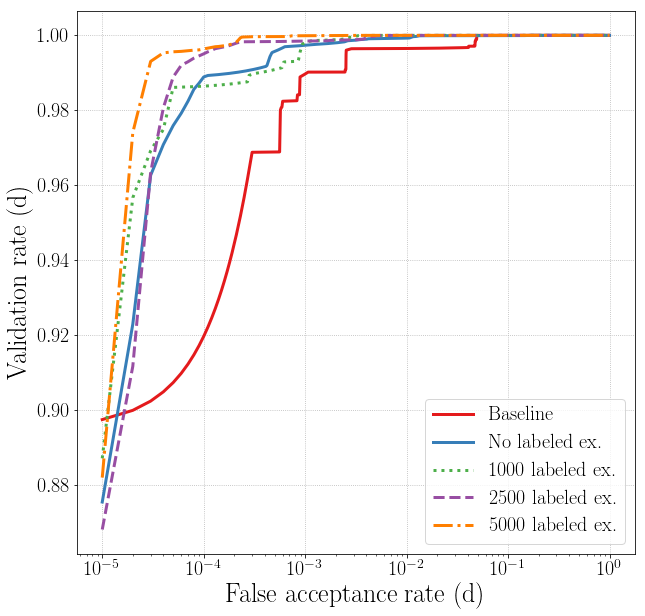

In [16]:
import library.helpers as h
import numpy as np
from scipy.interpolate import interp1d
import brewer2mpl

LOG_NAME = "spirit2"

bmap = brewer2mpl.get_map('Set1', 'qualitative', 5) # https://matplotlib.org/examples/color/colormaps_reference.html
colors = bmap.mpl_colors
linestyles = [
    "-",
    "-",
    ":",
    "--",
    "-."
]

labels = [
   "Baseline",
   "No labeled ex.",
   "1000 labeled ex.",
   "2500 labeled ex.",
   "5000 labeled ex.",
]

markers = [
    None,
    None,
    None,
    None,
    None,
]

params = {
   'axes.labelsize': 26,
   'font.size': 26,
   'font.family':'serif',
   'font.serif': 'Computer Modern Roman',
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': True,
    
   }
mpl.rcParams.update(params)



if LOG_NAME=="unix_forensic":
    to_load = [
        "results/%s/basline-jaccard/01050-results.csv"%LOG_NAME, # baseline jaccard
        "results/%s/jd-la-xnon-pt30-nt70-llall-lcall-ee00002-ep30/01050-results.csv"%LOG_NAME, # no labels
        "results/%s/jd-la-x01000-pt30-nt70-llall-lcall-ee00002-ep30/01050-results.csv"%LOG_NAME, # 1000 labels
        "results/%s/jd-la-x02500-pt30-nt70-llall-lcall-ee00002-ep30/01050-results.csv"%LOG_NAME, # 2500 labelss
        "results/%s/jd-la-x05000-pt30-nt70-llall-lcall-ee00002-ep30/01050-results.csv"%LOG_NAME, # 2000 labelss
    ]
elif LOG_NAME=="bgl2":
    to_load = [
        "results/%s/basline-jaccard/09460-0.10-results.csv"%LOG_NAME,                    # baseline jaccard
         "results/%s/jd-la-xnon-pt30-nt70-llall-lcall-ee00002-ep30/09460-results.csv"%LOG_NAME, # no labels
         "results/%s/jd-la-x01000-pt30-nt70-llall-lcall-ee00002-ep30/09460-results.csv"%LOG_NAME,  # 1000 labels
         "results/%s/jd-la-x02500-pt30-nt70-llall-lcall-ee00002-ep30/09460-results.csv"%LOG_NAME, # 2500 labels
         "results/%s/jd-la-x05000-pt30-nt70-llall-lcall-ee00002-ep30/09460-results.csv"%LOG_NAME, # 5000 labels
    ]
elif LOG_NAME=="spirit2":
    to_load = [
        "results/%s/basline-jaccard/06500-0.10-results.csv"%LOG_NAME, # baseline jaccard
        "results/%s/jd-la-xnon-pt30-nt70-llall-lcall-ee00002-ep30/07150-results.csv"%LOG_NAME, # no labels
        "results/%s/jd-la-x01000-pt30-nt70-ll00050-lcall-ee00002-ep05/07150-results.csv"%LOG_NAME, # 1000 labels
        "results/%s/jd-la-x02500-pt30-nt70-llall-lcall-ee00002-ep30/07150-results.csv"%LOG_NAME, # 2500 labels
        "results/%s/jd-la-x05000-pt30-nt70-ll00050-lcall-ee00002-ep30/07150-results.csv"%LOG_NAME, # 5000 labels
    ]

fac_n = np.arange(0.00001, 1.0, 0.00001)
fig = plt.figure(figsize=(10,10))

for i, file_name in enumerate(to_load):
    label = labels[i]
    color = colors[i]
    linestyle = linestyles[i]
    
    data = np.array(h.load_from_csv(file_name)[1:])
    valid_accepts = data[:,7].astype("float64")
    false_accepts = data[:,8].astype("float64")
    interpolated_vac = interp1d(false_accepts, valid_accepts, bounds_error=True)
    plt.plot( fac_n  , interpolated_vac(fac_n) , color=color, label=label, linewidth=3.0, linestyle=linestyle, marker=markers[i])

# create plot
   
    
# plt.title("VAR/FAR (%s) LA"%LOG_NAME)
plt.xlabel('False acceptance rate (d)', )
plt.ylabel('Validation rate (d)')
plt.legend(loc='lower right')    
plt.xscale("log")
plt.grid(linestyle='dotted')
plt.savefig("results/%s.pdf"%LOG_NAME)
plt.show()


In [3]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import library.helpers as h
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
from scipy.integrate import simps
from scipy.interpolate import interp1d


LOG_NAME = "unix_forensic"
VIZUALIZATIONS_DIR = "visualizations"

fig = plt.figure(figsize=(10,10))

COLORS = h.get_N_HexCol(len(MODEL_NAMES)+1)

fac_n = np.arange(0, 1.0, 0.0005)

# 02100-results.csv



interpolated_vac = interp1d(baseline_false_accepts, baseline_valid_accepts)
vac_n = interpolated_vac(fac_n)
auc_score = auc(fac_n, vac_n)

plt.plot( fac_n,  interpolated_vac(fac_n), color='r', label="%0.3f,baseline"%auc_score)
plt.xscale("log")

for i, model_name in enumerate(MODEL_NAMES):
    #print(model_name)
    valid_accepts = h.load_from_json("data/%s_%s_valid.json"%(model_name, LOG_NAME))
    false_accepts = h.load_from_json("data/%s_%s_false.json"%(model_name, LOG_NAME))
    interpolated_vac = interp1d(false_accepts, valid_accepts)
    auc_score = auc(fac_n, interpolated_vac(fac_n))
    plt.plot( fac_n, interpolated_vac(fac_n) , color=COLORS[i+1], label="%0.3f, %s"%(auc_score,  model_name))

plt.title("VAR/FAR (%s) LA"%LOG_NAME)
plt.xlabel('FAR')
plt.ylabel('VAL')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("%s/roc_%s.png"%(VIZUALIZATIONS_DIR, LOG_NAME))


NameError: name 'MODEL_NAMES' is not defined